<a href="https://colab.research.google.com/github/TerryTian21/COVID-Data-GUI/blob/main/JSC_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to Collab](https://colab.research.google.com/drive/1QpqI-E7tugRUDevcFTO2h0-E2OeZkmoz?usp=sharing)

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf 

#Data

In [3]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
income_df = pd.read_csv(path)
income_df.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial Data Exploration

## Analyzing Columns
- From the following code observe a sample of the dataset by looking at the first 10 row
- There are a total of 14 columns 
- The data types for each column match the description outlined in [data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

DataTypes 

- Age, Captial Gain, Capital Loss and Hours per week are type int64 -> Continuous Data
- The rest of the data is type Object which implies strings and consistent as they are categorical data

In [4]:
income_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32560 non-null  int64 
 1   workclass           32560 non-null  object
 2   fnlwgt              32560 non-null  int64 
 3   education           32560 non-null  object
 4   education_num       32560 non-null  int64 
 5   marital_status      32560 non-null  object
 6   occupation          32560 non-null  object
 7   relationship        32560 non-null  object
 8   race                32560 non-null  object
 9   sex                 32560 non-null  object
 10  capital_gain        32560 non-null  int64 
 11  capital_loss        32560 non-null  int64 
 12  hours_per_week      32560 non-null  int64 
 13  native_country      32560 non-null  object
 14  gross_income_group  32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Missing Data
- Observe the next code section which displays the NaN data for each column.
- Notice how there are no values explicitly labelled as Nan or Null

In [6]:
income_df.isna().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country        0
gross_income_group    0
dtype: int64

- However if we manually look through the dataset, we observe '?' values, which we take to be missing.
- Notice how : workclass, occupation, and native_country have 1836, 1843 and 583 null values respectively

In [7]:
# Find the number of ? in each column
count_question_marks = lambda col: col.astype(str).str.count('\?').sum()
income_df.apply(count_question_marks)

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

In [8]:
income_df = income_df.replace(' ?', np.NaN)
income_df.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

##Plotting Distributions 

- From the following graphs, we see there is a high concentration of 


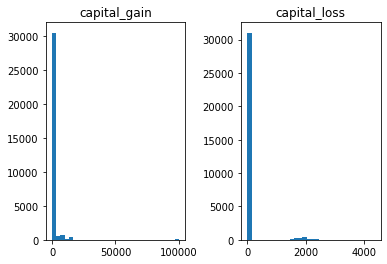

In [9]:
capital = income_df[['capital_gain', 'capital_loss']]
capital.hist(bins=30, grid=False)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

- Note that since a majority of the data is concentrated at 0, we can create 2 categories to differential observations with capital gain/loss.
- We do so by transforming the numerical variable to a categorical variable with 2 bins
- One which specifies positive gain/loss and one which specifies 0 gain/loss

In [10]:
income_df['capital_gain'] = np.sign(income_df['capital_gain']).map({0: 'No', 1: 'Yes'})
income_df['capital_loss'] = np.sign(income_df['capital_loss']).map({0: 'No', 1: 'Yes'})
income_df.groupby(['capital_gain', 'capital_loss']).size()
print(income_df['capital_loss'].value_counts())
print(income_df['capital_gain'].value_counts())

No     31041
Yes     1519
Name: capital_loss, dtype: int64
No     29849
Yes     2711
Name: capital_gain, dtype: int64


- Here we will plot the distribution of the transformed columns capital gain and capital loss

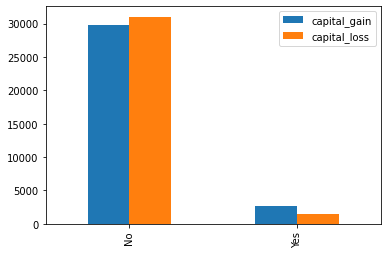

In [11]:
capital = income_df[['capital_gain', 'capital_loss']]
capital = capital.apply(pd.Series.value_counts)
capital.plot.bar()

## Distribution of fnlwgt

- From the following plot, the histogram seems to be right skewed. This is indicative that most samples have a population totals less than 200000
- The distribution between men and women appears to be similar

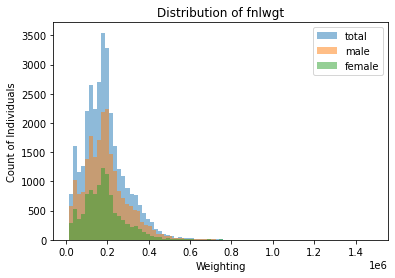

In [12]:
male = income_df[income_df['sex'] == ' Male']
female = income_df[income_df['sex'] == ' Female']

plt.hist(income_df['fnlwgt'], bins = 75, alpha=0.5, label = "total")
plt.hist(male['fnlwgt'], bins = 75, alpha=0.5, label = "male")
plt.hist(female['fnlwgt'], bins = 75, alpha=0.5, label = "female")

plt.legend(loc='upper right')
plt.title("Distribution of fnlwgt")
plt.xlabel("Weighting")
plt.ylabel("Count of Individuals")
plt.show()

- With such a large dataset, there are bound to be outliers
- However, we shouldn't easily discard said outliers in cases future analyses depends on population size

In [13]:
Q1 = income_df['fnlwgt'].quantile(0.25)
Q3 = income_df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = income_df[(income_df['fnlwgt'] < (Q1 - threshold * IQR)) | (income_df['fnlwgt'] > (Q3 + threshold * IQR))]


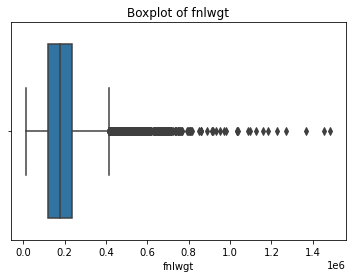

In [14]:
sns.boxplot(x = 'fnlwgt', data = income_df)
plt.xlabel('fnlwgt')
plt.title('Boxplot of fnlwgt')
plt.show()

# Correlation

## Checking Correlation
- Observe the following pairwise plots

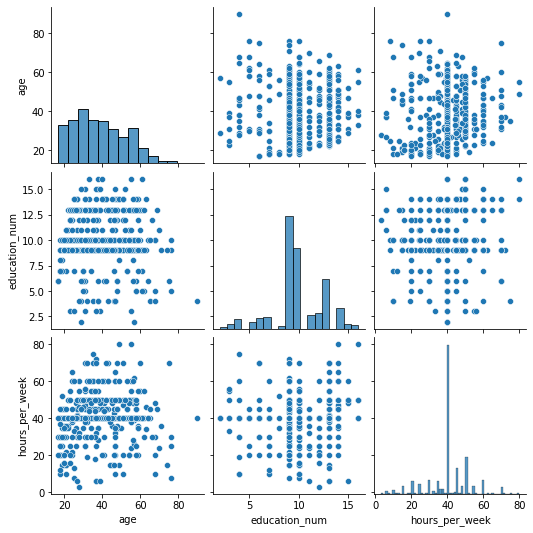

In [15]:
correlation = income_df[['age', 'education_num', 'hours_per_week']]
correlation = correlation.sample(n=500)
sns.pairplot(correlation)
plt.show()

In [16]:
correlation_matrix = correlation.corr()
correlation_matrix

,age,education_num,hours_per_week
age,1.000000,-0.013808,0.101486
education_num,-0.013808,1.000000,0.105317
hours_per_week,0.101486,0.105317,1.000000


- From the graphs, there seem to be little correlation between the variables as they appear to be randomly distributed
- This observation is confirmed by the correlation matrix where no two variables have a |correlation| > 0.2
  

## Statistical Testing

From the above correlation matrix note that the |correlation| between education num and hours per week > 0.1 so we will perform a hypothesis test

- Set $H_0$ to be the null hypothesis where there is no relationship between education num and hours per week.

- Set $H_1$ to be the alternate hypothesis

It suffices to show a small p-value $\rightarrow$ evdience against the null
- Observe from the following code, the p-value is approximately 0 which implies there is strong correlation between age and hours per week
- The $\beta_1$ value represents the average change in education for every change in age and is calculated to be 0.6898
- This intuitively makes sense since we would expect people with more education to be working longer.



In [17]:
x = correlation['education_num']
y = correlation['hours_per_week']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.586
Date:                Tue, 14 Feb 2023   Prob (F-statistic):             0.0185
Time:                        01:05:06   Log-Likelihood:                -1947.5
No. Observations:                 500   AIC:                             3899.
Df Residuals:                     498   BIC:                             3908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            35.4010      2.137     16.566

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Correlation Accounting For Gender
Observe the two following hypothesis tests performed for finding correlation between age and number of education hours dependent on gender

- For females (-0.012): There is a negative correlation between age and education num

- For males (0.060): There is a positive correlation between age and education num
- However if we take |corr_male| and compare that with |corr_female| the difference is very small with |corr_male| is slightly larger indicating a stronger correlation

In [18]:
corr_male = male['education_num'].corr(male['age'])
print(corr_male)

corr_female = female['education_num'].corr(female['age'])
print(corr_female)


0.06048967335170156
-0.017899243935447715


## Covariance Matrix

From the covariance matrix between hours per week and education num, we observe:
- Var(hours_per_week) = 152.5
- Var(education_num) = 6.6
- Covariance(hours_per_week, education_num) = 4.7

This makes sense since education_num uses years as units and hours_per_week uses hours. There is a large variance since there are likely individuals who work 0 hours and others than work the whole week.

Note positive covariance is individuative a positive relationship between the two variables.

In [19]:
compare = income_df[['education_num', 'hours_per_week']]
compare.cov()

,education_num,hours_per_week
education_num,6.618831,4.705522
hours_per_week,4.705522,152.463672


# Regression

Fitting a Linear Regression for hours_per_week as the dependent variable and sex as the feature.

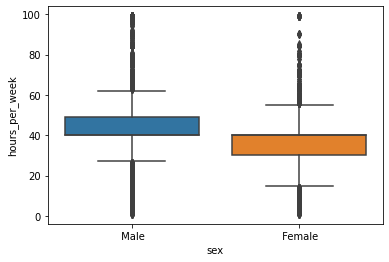

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:31:17   Log-Likelihood:            -1.2716e+05
No. Observations:               32560   AIC:                         2.543e+05
Df Residuals:                   32558   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.407   

In [31]:
sns.boxplot(x='sex', y = 'hours_per_week', data = income_df)
plt.show()

reg = smf.ols('hours_per_week ~ sex', data=income_df).fit()
print(reg.summary())


## Analysis

From the following code we observe the $\beta_1$ value is 6.02. This shows that men tend to work more hours. Since, sex is a categorical variable, it first needed to be transformed into a dummy variable where males take value of 1 and females 0. Consequently the intercept shows average hours_per_week for females, $\beta_1$ shows the average difference in hours between males and females. Thus, a positive correlation indicates men work more hours.

## Education_num as a Control 

The following charts show the result of adding education_num as a control variable

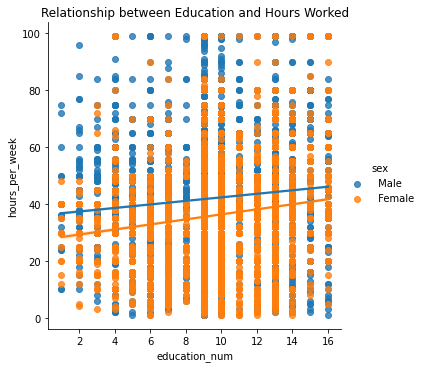

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:33:47   Log-Likelihood:            -1.2679e+05
No. Observations:               32560   AIC:                         2.536e+05
Df Residuals:                   32557   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4100      0.281    104.550

In [38]:
sns.lmplot(x='education_num', y='hours_per_week', hue='sex', data=income_df)
plt.title("Relationship between Education and Hours Worked")
plt.show()

reg1 = smf.ols('hours_per_week ~ sex + education_num', data=income_df).fit()
print(reg1.summary())

The following charts show the result of adding education_num as a control variable
- The trend in hours worked by men and woman remains the same. This is justified by observing the sex coefficient which is 5.97 > 0.
- The coefficient for education_num is statistically significant as the p value is immeasurably small (displayed as 0). This means there is a strong correlation between education_num and hours per week
- The 95% Confidence interval for education_num vs hours_per_week in about [0.647, 0.748]

## Add gross_income_group as a binary variable



                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        02:01:50   Log-Likelihood:            -1.2643e+05
No. Observations:               32560   AIC:                         2.529e+05
Df Residuals:                   32556   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

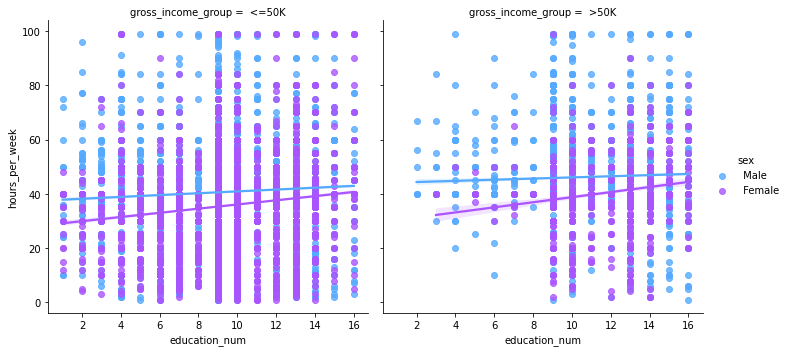

In [54]:
sns.lmplot(data=income_df, x="education_num", y="hours_per_week", hue="sex", col="gross_income_group", fit_reg=True, palette="cool") 

reg2 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data=income_df).fit()
print(reg2.summary())

From the above table we get
- The coefficient for sex in each model represents the average difference in response between the male and femals and for each model the coefficients are 6.02, 5.97 and 5.10

- Observe the p values for each variable is approximately 0, meaning all 3 features are significant 

- However, the log likelihood value is negative indicating that the fit of the model is inadequate.

To determine the best model, we can use the $R^2$ and RMSE values alongside the log likelihood. From the code below we get:
- R-squared: a measure of how well the model fits the data. Higher R-squared values indicate a better fit.
- Root Mean Square Error (RMSE): a measure of the difference between the predicted and actual values. Lower RMSE values indicate a better fit.


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Split Data Set in Training and Prediction
X1 = income_df["sex"]
X2 = income_df[["sex", 'education_num']]
X3 = income_df[['sex', 'education_num', 'gross_income_group']]
Y = income_df['hours_per_week']

X1 = pd.get_dummies(X1)
X2 = pd.get_dummies(X2, columns=['sex'])
X3 = pd.get_dummies(X3, columns=['sex', 'gross_income_group'])


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size=0.2)


#Training the Model
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)

#Making 
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)
y3_pred = model3.predict(X3_test)

# Calculate R^2 and RMSE
rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
r_squared1 = model1.score(X1_test, y1_test)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)
r_squared2 = model2.score(X2_test, y2_test)
rmse3 = mean_squared_error(y3_test, y3_pred, squared=False)
r_squared3 = model3.score(X3_test, y3_test)

table = pd.DataFrame({'Linear Regression Model' : ['1', '2', '3'],
                   'adjusted R squared' : [r_squared1 ,r_squared2 ,r_squared3], 
                   'RMSE' : [rmse1, rmse2, rmse3]})

print(table)


  Linear Regression Model  adjusted R squared       RMSE
0                       1            0.051596  11.922012
1                       2            0.083586  11.708720
2                       3            0.097918  11.800512


From the above table we can say:
- Since all 3 models have similar RMSE's, we can compare the accuracy of the model with the R-squared value. Since, Modle 3 has the highest R-squared, it would be the best out of the 3.
- However, note that all 3 models have high RMSE and Low R-squared which is indicative that theses variables are not linearally corrolated.

# Own Regression Analysis